In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv("credit_card_fraud_dataset (1).csv")

In [97]:
df.head(5)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [98]:
df.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [100]:
df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [101]:
df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [102]:
df.columns=df.columns.str.strip()

In [103]:
df.drop(columns=["TransactionID"],inplace=True)

In [104]:
df.columns

Index(['TransactionDate', 'Amount', 'MerchantID', 'TransactionType',
       'Location', 'IsFraud'],
      dtype='object')

In [105]:
df['MerchantID'].value_counts()

MerchantID
461    149
188    134
192    129
517    128
820    126
      ... 
119     75
936     74
968     73
635     71
512     69
Name: count, Length: 1000, dtype: int64

In [106]:
df["IsFraud"].value_counts() 

IsFraud
0    99000
1     1000
Name: count, dtype: int64

In [107]:

from imblearn.combine import SMOTETomek
import numpy as np

df_encoded = df.copy()
df_encoded = pd.get_dummies(df, columns=["TransactionType", "Location"])

X = df_encoded.drop(columns=["IsFraud", "TransactionDate"]) 
y = df_encoded["IsFraud"]

st = SMOTETomek(random_state=42)
X_resample, y_resample = st.fit_resample(X, y)

bal_df = pd.concat([pd.DataFrame(X_resample, columns=X.columns), pd.DataFrame(y_resample, columns=["IsFraud"])], axis=1)

In [108]:
df_encoded.columns

Index(['TransactionDate', 'Amount', 'MerchantID', 'IsFraud',
       'TransactionType_purchase', 'TransactionType_refund',
       'Location_Chicago', 'Location_Dallas', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia',
       'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego',
       'Location_San Jose'],
      dtype='object')

In [109]:
bal_df["IsFraud"].value_counts()

IsFraud
0    95518
1    95518
Name: count, dtype: int64

/tmp/ipykernel_22093/1019146672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bal_df["IsFraud"], palette=["blue", "red"])


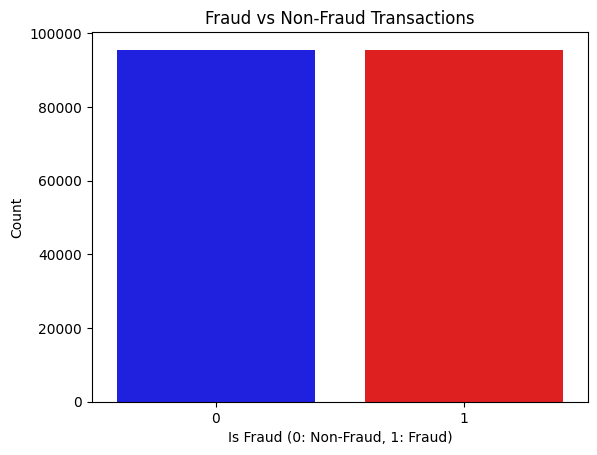

In [110]:
sns.countplot(x=bal_df["IsFraud"], palette=["blue", "red"])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(152828, 14) (38208, 14)


In [112]:
X_train.columns

Index(['Amount', 'MerchantID', 'TransactionType_purchase',
       'TransactionType_refund', 'Location_Chicago', 'Location_Dallas',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York',
       'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio',
       'Location_San Diego', 'Location_San Jose'],
      dtype='object')

In [113]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=42,max_iter=1000)
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [114]:
X_train.columns

Index(['Amount', 'MerchantID', 'TransactionType_purchase',
       'TransactionType_refund', 'Location_Chicago', 'Location_Dallas',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York',
       'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio',
       'Location_San Diego', 'Location_San Jose'],
      dtype='object')

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     19083
           1       1.00      0.93      0.97     19125

    accuracy                           0.97     38208
   macro avg       0.97      0.97      0.97     38208
weighted avg       0.97      0.97      0.97     38208



In [116]:
from sklearn.model_selection import cross_val_score
cross_val_score(lg, X_resample, y_resample, cv=5).mean()


0.967283761024261

In [117]:
lrg = LogisticRegression(C=0.5, class_weight='balanced', max_iter=2000, solver='liblinear',random_state=42)
lrg.fit(X_train,y_train)
y_pred=lrg.predict(X_test)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     19083
           1       1.00      0.93      0.97     19125

    accuracy                           0.97     38208
   macro avg       0.97      0.97      0.97     38208
weighted avg       0.97      0.97      0.97     38208



In [119]:
print("Training columns:", X_train.columns.tolist())


Training columns: ['Amount', 'MerchantID', 'TransactionType_purchase', 'TransactionType_refund', 'Location_Chicago', 'Location_Dallas', 'Location_Houston', 'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego', 'Location_San Jose']


In [120]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5, min_samples_leaf=2,random_state=42, class_weight="balanced")
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [121]:
print("Training columns:", X_train.columns.tolist())


Training columns: ['Amount', 'MerchantID', 'TransactionType_purchase', 'TransactionType_refund', 'Location_Chicago', 'Location_Dallas', 'Location_Houston', 'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego', 'Location_San Jose']


In [122]:
y_train_pred = rf.predict(X_train)
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

Training Set Metrics:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     76435
           1       1.00      0.93      0.97     76393

    accuracy                           0.97    152828
   macro avg       0.97      0.97      0.97    152828
weighted avg       0.97      0.97      0.97    152828



In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     19083
           1       1.00      0.93      0.96     19125

    accuracy                           0.97     38208
   macro avg       0.97      0.97      0.97     38208
weighted avg       0.97      0.97      0.97     38208



In [124]:
# import xgboost as xgb
# import numpy as np
# from sklearn.metrics import classification_report
# xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
# xgb.fit(X_train, y_train)
# y_pred_xgb = xgb.predict(X_test)
# print(classification_report(y_test, y_pred_xgb))


In [125]:
# so RandomForest is Best

In [127]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')

In [128]:
cv_scores

array([0.99316913, 0.99379331, 0.9932745 , 0.99230769, 0.99277836])

In [129]:
print(cv_scores.mean())
print(cv_scores.std())

0.9930645979043561
0.000498164655641016


In [130]:
print(rf)
print(type(rf))

RandomForestClassifier(class_weight='balanced', random_state=42)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [131]:
import pickle

# Save the trained model
with open('fraud_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [132]:
X_train.columns

Index(['Amount', 'MerchantID', 'TransactionType_purchase',
       'TransactionType_refund', 'Location_Chicago', 'Location_Dallas',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York',
       'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio',
       'Location_San Diego', 'Location_San Jose'],
      dtype='object')

RandomForestClassifier(class_weight='balanced', random_state=42)


1.3.2


array(['San Antonio', 'Dallas', 'New York', 'Philadelphia', 'Phoenix',
       'Chicago', 'San Jose', 'San Diego', 'Houston', 'Los Angeles'],
      dtype=object)

Model was trained with 5 features


['Amount', 'MerchantID', 'TransactionType_purchase', 'TransactionType_refund', 'Location_Chicago', 'Location_Dallas', 'Location_Houston', 'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego', 'Location_San Jose']
